In [1]:
## Import necessary libaries

import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
## Find and store files in a variable

aapl_path = Path('appl_historical.csv')
algo_path = Path('algo_returns.csv')
cost_path = Path('cost_historical.csv')
goog_path = Path('goog_historical.csv')
sp500_path = Path('sp500_history.csv')
whale_path = Path('whale_returns.csv')


In [3]:
## Read csv files and store in variable

whale_df = pd.read_csv(whale_path, index_col = 'Date', parse_dates = True)
sp500_df = pd.read_csv(sp500_path, index_col = 'Date', parse_dates = True)
algo_df = pd.read_csv(algo_path, index_col = 'Date', parse_dates = True)

In [4]:
## Identify and remove all nulls

whale_df.isnull().sum()
sp500_df.isnull().sum()
algo_df.isnull().sum()

whale_df = whale_df.dropna()
sp500_df = sp500_df.dropna()
algo_df = algo_df.dropna()

In [5]:
## Remove extra symbols from all the data
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']

## Retrieve the data types for all the data
sp500_df.dtypes

## Converts all of the data in the Close columns into floats
sp500_df['Close'] = sp500_df['Close'].astype('float')

# Check the data types for the changed ata
sp500_df.dtypes


C:\Users\maria\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [13]:
## Converts all necessary data into daily returns
whale_returns = whale_df
algo_returns = algo_df
sp500_returns = sp500_df.pct_change()
sp500_returns.columns = ['S&P TSX']
sp500_returns.head()

,S&P TSX
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
#Join the whale, algo, and sp500 returns into one dataframe

combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:xlabel='Date'>

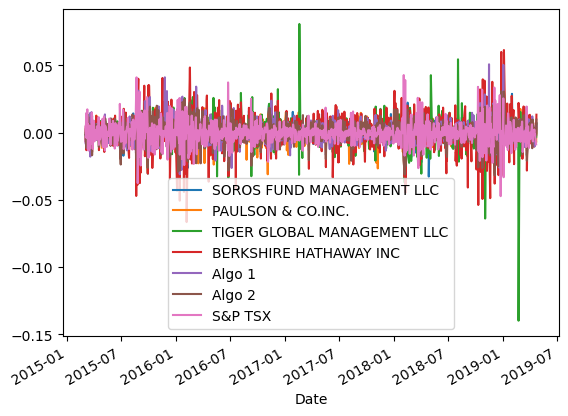

In [16]:
 ## Calculate and plot dailry returns of all portfolios
combined_df.plot()

<AxesSubplot:xlabel='Date'>

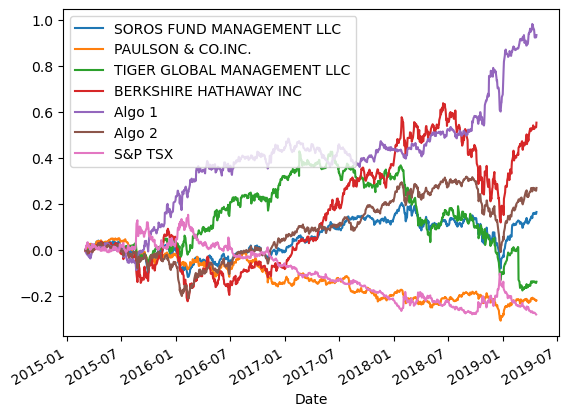

In [17]:
## Calculate and plot cumulative returns for all portfolios

cumulative_df = (1 + combined_df).cumprod() - 1
cumulative_df.plot()

<AxesSubplot:>

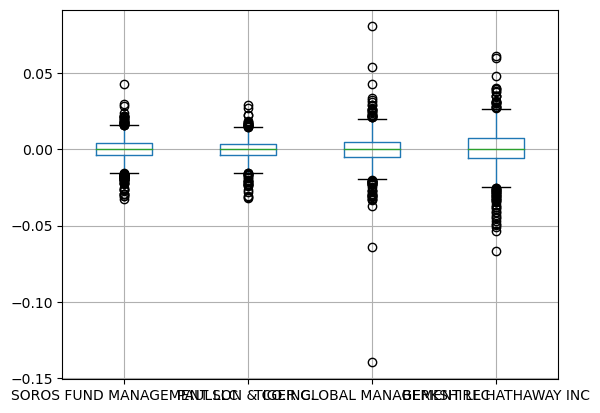

In [18]:
## Create a boxplot for the Whale Daily Returns
whale_returns.boxplot()

<AxesSubplot:>

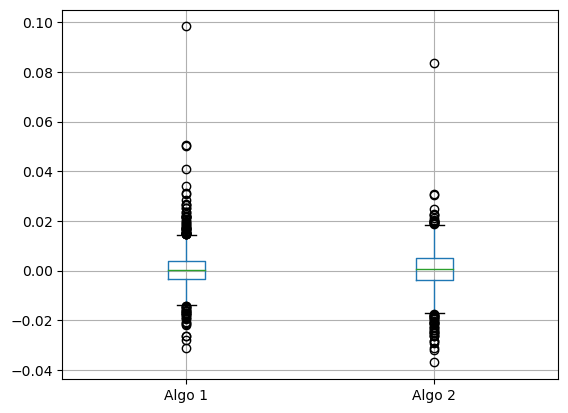

In [19]:
## Create a boxplot for the Algo Daily Returns

algo_returns.boxplot()

In [22]:
## Create standard deviation for Whales Daily Returns
whale_returns.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

<AxesSubplot:>

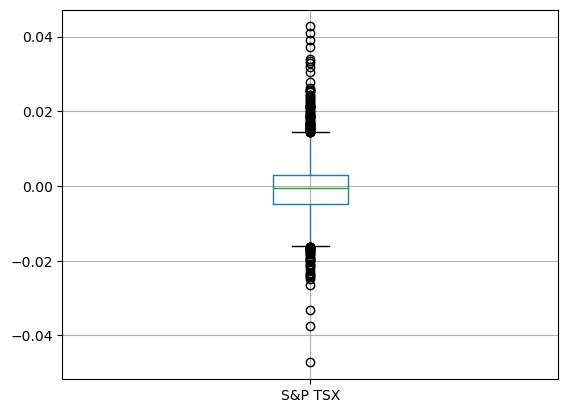

In [20]:
## Create a boxplot for the SP500 Daily Returns

sp500_returns.boxplot()

<AxesSubplot:>

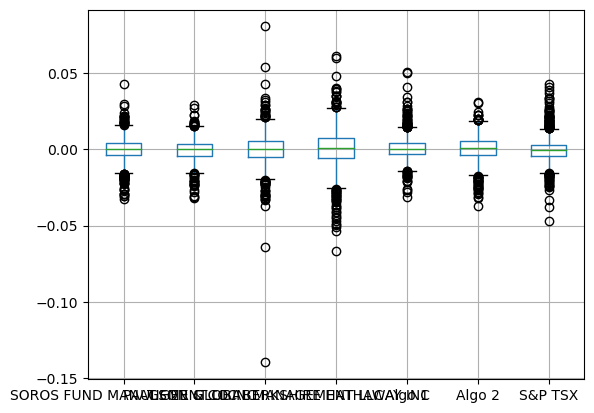

In [26]:
## Createa a boxplot for Combined Daily Returns
combined_df.boxplot()

In [23]:
## Create standard deviation for Algo Daily Returns
algo_returns.std()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [24]:
## Create standard deviation for SP500 Daily Returns
sp500_returns.std()

S&P TSX    0.008135
dtype: float64

In [25]:
## Create standard deviation for Combined Daily Returns
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P TSX                        0.008587
dtype: float64

In [28]:
var = combined_df.var()
mean_combined = combined_df.mean() + 1
np.sqrt(((var + (mean_combined**2))**12) - mean_combined**24)

SOROS FUND MANAGEMENT LLC      0.027408
PAULSON & CO.INC.              0.024275
TIGER GLOBAL MANAGEMENT LLC    0.037716
BERKSHIRE HATHAWAY INC         0.045022
Algo 1                         0.026594
Algo 2                         0.028988
S&P TSX                        0.029660
dtype: float64

<AxesSubplot:xlabel='Date'>

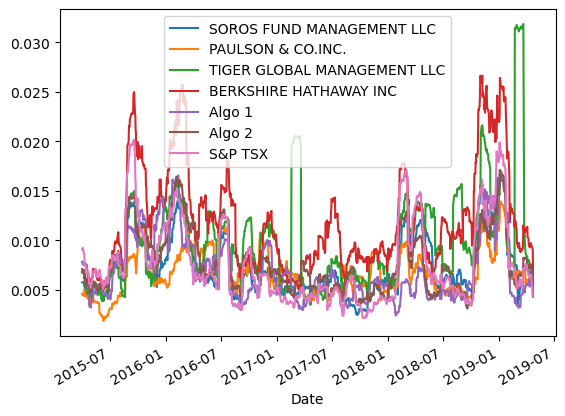

In [30]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window 
combined_21 = combined_df.rolling(window=21).std()
combined_21.plot()